<a href="https://colab.research.google.com/github/ramaoutlook/Image-Classification-with-CNN-Keras-Tensorflow-CIFER-10-Task3-CodTech/blob/main/Image_Classification_with_CNN_Keras_Tensorflow_CIFER_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNN Image Classification with CIFAR-10 DataSet

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, callbacks, optimizers, regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [2]:
# 1. Load and Explore the CIFAR-10 Dataset

print("Loading CIFAR-10 dataset...")
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

Loading CIFAR-10 dataset...
170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step


In [4]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [5]:
# prompt: print some values of x_train and y_train like we run df.head() to see first 5 rows of the data frame

print("First 2 values of X_train:")
print(X_train[:2])


First 2 values of X_train:
[[[[ 59  62  63]
   [ 43  46  45]
   [ 50  48  43]
   ...
   [158 132 108]
   [152 125 102]
   [148 124 103]]

  [[ 16  20  20]
   [  0   0   0]
   [ 18   8   0]
   ...
   [123  88  55]
   [119  83  50]
   [122  87  57]]

  [[ 25  24  21]
   [ 16   7   0]
   [ 49  27   8]
   ...
   [118  84  50]
   [120  84  50]
   [109  73  42]]

  ...

  [[208 170  96]
   [201 153  34]
   [198 161  26]
   ...
   [160 133  70]
   [ 56  31   7]
   [ 53  34  20]]

  [[180 139  96]
   [173 123  42]
   [186 144  30]
   ...
   [184 148  94]
   [ 97  62  34]
   [ 83  53  34]]

  [[177 144 116]
   [168 129  94]
   [179 142  87]
   ...
   [216 184 140]
   [151 118  84]
   [123  92  72]]]


 [[[154 177 187]
   [126 137 136]
   [105 104  95]
   ...
   [ 91  95  71]
   [ 87  90  71]
   [ 79  81  70]]

  [[140 160 169]
   [145 153 154]
   [125 125 118]
   ...
   [ 96  99  78]
   [ 77  80  62]
   [ 71  73  61]]

  [[140 155 164]
   [139 146 149]
   [115 115 112]
   ...
   [ 79  82  64]
 

In [6]:
print("\nFirst 5 values of y_train:")
print(y_train[:5])


First 5 values of y_train:
[[6]
 [9]
 [9]
 [4]
 [1]]


In [7]:
# Convert pixel values to float32 and normalize to range [0, 1]
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [8]:
print("\nFirst 2 values of X_train after converting :")
print(X_train[:2])


First 2 values of X_train after converting :
[[[[0.23137255 0.24313726 0.24705882]
   [0.16862746 0.18039216 0.1764706 ]
   [0.19607843 0.1882353  0.16862746]
   ...
   [0.61960787 0.5176471  0.42352942]
   [0.59607846 0.49019608 0.4       ]
   [0.5803922  0.4862745  0.40392157]]

  [[0.0627451  0.07843138 0.07843138]
   [0.         0.         0.        ]
   [0.07058824 0.03137255 0.        ]
   ...
   [0.48235294 0.34509805 0.21568628]
   [0.46666667 0.3254902  0.19607843]
   [0.47843137 0.34117648 0.22352941]]

  [[0.09803922 0.09411765 0.08235294]
   [0.0627451  0.02745098 0.        ]
   [0.19215687 0.10588235 0.03137255]
   ...
   [0.4627451  0.32941177 0.19607843]
   [0.47058824 0.32941177 0.19607843]
   [0.42745098 0.28627452 0.16470589]]

  ...

  [[0.8156863  0.6666667  0.3764706 ]
   [0.7882353  0.6        0.13333334]
   [0.7764706  0.6313726  0.10196079]
   ...
   [0.627451   0.52156866 0.27450982]
   [0.21960784 0.12156863 0.02745098]
   [0.20784314 0.13333334 0.07843138]]


In [9]:
# Convert class labels to one-hot encoding
num_classes = 10
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

In [10]:
# Display dataset information
print(f"Training data shape: {X_train.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Test data shape: {X_test.shape}")
print(f"Test labels shape: {y_test.shape}")

Training data shape: (50000, 32, 32, 3)
Training labels shape: (50000, 10)
Test data shape: (10000, 32, 32, 3)
Test labels shape: (10000, 10)


In [11]:
# Class names for CIFAR-10
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
               'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

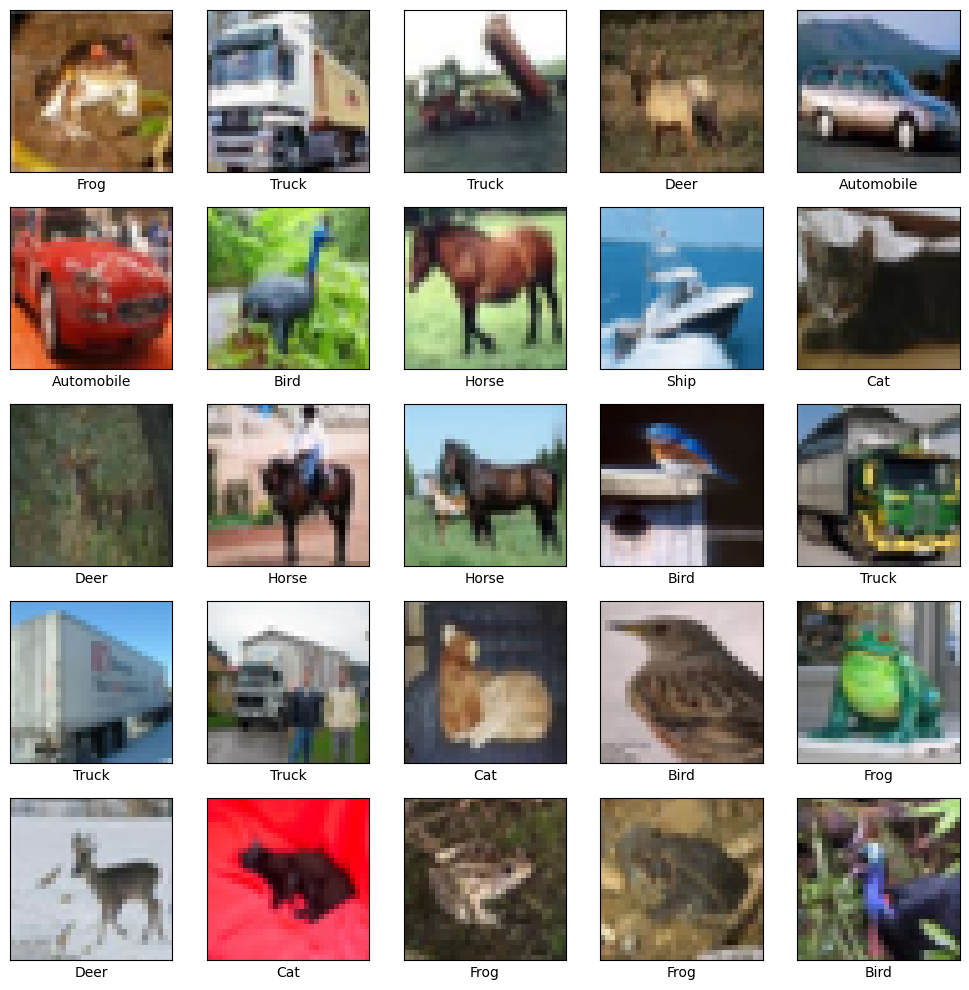

In [12]:
# Visualize some examples
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i])
    plt.xlabel(class_names[np.argmax(y_train[i])])
plt.tight_layout()
plt.show()

### Splitting the Data To Train and Validation Sets

In [13]:
# Split training data to create a validation set
# Use 20% of training data for validation
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

print(f"Final training data shape: {X_train.shape}")
print(f"Validation data shape: {X_val.shape}")

Final training data shape: (40000, 32, 32, 3)
Validation data shape: (10000, 32, 32, 3)


## CNN Model Building

In [14]:
def build_cnn_model():
    model = models.Sequential([
        # First Convolutional Block
        layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)),
        layers.BatchNormalization(),
        layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.2),

        # Second Convolutional Block
        layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
        layers.BatchNormalization(),
        layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.3),

        # Third Convolutional Block
        layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
        layers.BatchNormalization(),
        layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.4),

        # Dense layers
        layers.Flatten(),
        layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])

    # Compile the model
    model.compile(
        optimizer=optimizers.Adam(learning_rate=0.001),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

## Creating the Model

In [15]:
# Create the model
model = build_cnn_model()
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 552,874 (2.11 MB)

 Trainable params: 551,722 (2.10 MB)

 Non-trainable params: 1,152 (4.50 KB)

### Data Augmentation - Helps improve Model Generation and Performance reduces overfitting

In [16]:
# Create data generator for training data with augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.1
)

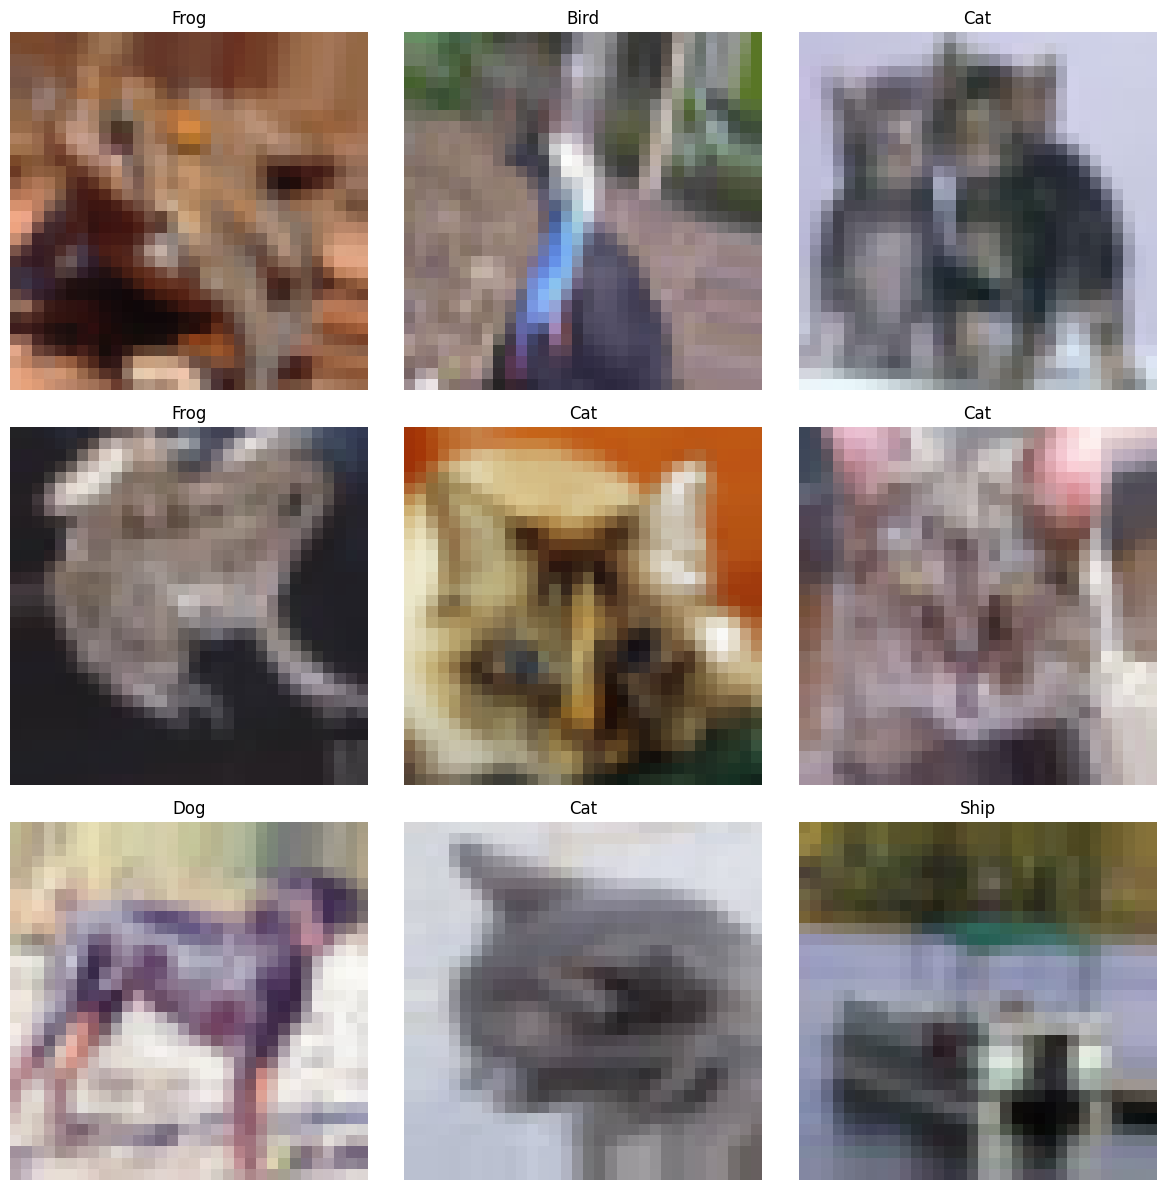

In [17]:
# Visualize some augmented images
plt.figure(figsize=(12, 12))
for X_batch, y_batch in datagen.flow(X_train[:9], y_train[:9], batch_size=9):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(X_batch[i])
        plt.title(class_names[np.argmax(y_batch[i])])
        plt.axis('off')
    plt.tight_layout()
    plt.show()
    break

### Callbacks for Training

In [18]:
# Create callbacks
early_stopping = callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

reduce_lr = callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=3,
    min_lr=0.00001
)

In [19]:
# Create model checkpoint to save the best model
checkpoint = callbacks.ModelCheckpoint(
    'best_cnn_model.h5',
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)


## Train the Model

In [20]:
batch_size = 64
epochs = 50

# Set datagen to work with our training data
datagen.fit(X_train)

# Train the model with data augmentation
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=batch_size),
    steps_per_epoch=len(X_train) // batch_size,
    epochs=epochs,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping, reduce_lr, checkpoint]
)

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


624/625 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.2988 - loss: 2.4658
Epoch 1: val_accuracy improved from -inf to 0.51690, saving model to best_cnn_model.h5


625/625 ━━━━━━━━━━━━━━━━━━━━ 46s 53ms/step - accuracy: 0.2990 - loss: 2.4645 - val_accuracy: 0.5169 - val_loss: 1.5691 - learning_rate: 0.0010
Epoch 2/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.5189 - loss: 1.5605
Epoch 2: val_accuracy improved from 0.51690 to 0.56130, saving model to best_cnn_model.h5


625/625 ━━━━━━━━━━━━━━━━━━━━ 27s 43ms/step - accuracy: 0.5189 - loss: 1.5604 - val_accuracy: 0.5613 - val_loss: 1.5015 - learning_rate: 0.0010
Epoch 3/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.5921 - loss: 1.3134
Epoch 3: val_accuracy improved from 0.56130 to 0.59290, saving model to best_cnn_model.h5


625/625 ━━━━━━━━━━━━━━━━━━━━ 42s 44ms/step - accuracy: 0.5921 - loss: 1.3134 - val_accuracy: 0.5929 - val_loss: 1.3601 - learning_rate: 0.0010
Epoch 4/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.6326 - loss: 1.1929
Epoch 4: val_accuracy improved from 0.59290 to 0.67450, saving model to best_cnn_model.h5


625/625 ━━━━━━━━━━━━━━━━━━━━ 28s 45ms/step - accuracy: 0.6326 - loss: 1.1928 - val_accuracy: 0.6745 - val_loss: 1.0761 - learning_rate: 0.0010
Epoch 5/50
624/625 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.6598 - loss: 1.0973
Epoch 5: val_accuracy did not improve from 0.67450
625/625 ━━━━━━━━━━━━━━━━━━━━ 27s 43ms/step - accuracy: 0.6598 - loss: 1.0973 - val_accuracy: 0.6523 - val_loss: 1.1820 - learning_rate: 0.0010
Epoch 6/50
624/625 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.6807 - loss: 1.0356
Epoch 6: val_accuracy did not improve from 0.67450
625/625 ━━━━━━━━━━━━━━━━━━━━ 27s 43ms/step - accuracy: 0.6808 - loss: 1.0355 - val_accuracy: 0.6745 - val_loss: 1.0964 - learning_rate: 0.0010
Epoch 7/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.7028 - loss: 0.9885
Epoch 7: val_accuracy improved from 0.67450 to 0.70790, saving model to best_cnn_model.h5


625/625 ━━━━━━━━━━━━━━━━━━━━ 27s 43ms/step - accuracy: 0.7028 - loss: 0.9885 - val_accuracy: 0.7079 - val_loss: 0.9771 - learning_rate: 0.0010
Epoch 8/50
624/625 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.7124 - loss: 0.9702
Epoch 8: val_accuracy improved from 0.70790 to 0.72570, saving model to best_cnn_model.h5


625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 42ms/step - accuracy: 0.7124 - loss: 0.9701 - val_accuracy: 0.7257 - val_loss: 0.9475 - learning_rate: 0.0010
Epoch 9/50
624/625 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.7265 - loss: 0.9226
Epoch 9: val_accuracy improved from 0.72570 to 0.75390, saving model to best_cnn_model.h5


625/625 ━━━━━━━━━━━━━━━━━━━━ 26s 42ms/step - accuracy: 0.7265 - loss: 0.9226 - val_accuracy: 0.7539 - val_loss: 0.8716 - learning_rate: 0.0010
Epoch 10/50
624/625 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.7366 - loss: 0.9027
Epoch 10: val_accuracy did not improve from 0.75390
625/625 ━━━━━━━━━━━━━━━━━━━━ 26s 42ms/step - accuracy: 0.7366 - loss: 0.9027 - val_accuracy: 0.7487 - val_loss: 0.8834 - learning_rate: 0.0010
Epoch 11/50
624/625 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.7487 - loss: 0.8704
Epoch 11: val_accuracy improved from 0.75390 to 0.77520, saving model to best_cnn_model.h5


625/625 ━━━━━━━━━━━━━━━━━━━━ 26s 42ms/step - accuracy: 0.7487 - loss: 0.8705 - val_accuracy: 0.7752 - val_loss: 0.7934 - learning_rate: 0.0010
Epoch 12/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.7556 - loss: 0.8476
Epoch 12: val_accuracy did not improve from 0.77520
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 41ms/step - accuracy: 0.7556 - loss: 0.8476 - val_accuracy: 0.7652 - val_loss: 0.8354 - learning_rate: 0.0010
Epoch 13/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.7582 - loss: 0.8412
Epoch 13: val_accuracy improved from 0.77520 to 0.78760, saving model to best_cnn_model.h5


625/625 ━━━━━━━━━━━━━━━━━━━━ 26s 41ms/step - accuracy: 0.7582 - loss: 0.8412 - val_accuracy: 0.7876 - val_loss: 0.7601 - learning_rate: 0.0010
Epoch 14/50
624/625 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.7680 - loss: 0.8124
Epoch 14: val_accuracy did not improve from 0.78760
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 41ms/step - accuracy: 0.7680 - loss: 0.8124 - val_accuracy: 0.7805 - val_loss: 0.7611 - learning_rate: 0.0010
Epoch 15/50
624/625 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.7685 - loss: 0.8082
Epoch 15: val_accuracy improved from 0.78760 to 0.80970, saving model to best_cnn_model.h5


625/625 ━━━━━━━━━━━━━━━━━━━━ 42s 43ms/step - accuracy: 0.7685 - loss: 0.8082 - val_accuracy: 0.8097 - val_loss: 0.7071 - learning_rate: 0.0010
Epoch 16/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.7744 - loss: 0.7904
Epoch 16: val_accuracy did not improve from 0.80970
625/625 ━━━━━━━━━━━━━━━━━━━━ 40s 41ms/step - accuracy: 0.7744 - loss: 0.7904 - val_accuracy: 0.8010 - val_loss: 0.7184 - learning_rate: 0.0010
Epoch 17/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.7812 - loss: 0.7852
Epoch 17: val_accuracy did not improve from 0.80970
625/625 ━━━━━━━━━━━━━━━━━━━━ 43s 45ms/step - accuracy: 0.7812 - loss: 0.7852 - val_accuracy: 0.7985 - val_loss: 0.7559 - learning_rate: 0.0010
Epoch 18/50
624/625 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.7855 - loss: 0.7582
Epoch 18: val_accuracy did not improve from 0.80970
625/625 ━━━━━━━━━━━━━━━━━━━━ 26s 41ms/step - accuracy: 0.7855 - loss: 0.7582 - val_accuracy: 0.8048 - val_loss: 0.7187 - learning_rate: 0.0010
Epoch 19

625/625 ━━━━━━━━━━━━━━━━━━━━ 26s 42ms/step - accuracy: 0.8003 - loss: 0.7095 - val_accuracy: 0.8434 - val_loss: 0.5721 - learning_rate: 2.0000e-04
Epoch 20/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.8209 - loss: 0.6385
Epoch 20: val_accuracy improved from 0.84340 to 0.85040, saving model to best_cnn_model.h5


625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 43ms/step - accuracy: 0.8209 - loss: 0.6385 - val_accuracy: 0.8504 - val_loss: 0.5375 - learning_rate: 2.0000e-04
Epoch 21/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.8200 - loss: 0.6162
Epoch 21: val_accuracy did not improve from 0.85040
625/625 ━━━━━━━━━━━━━━━━━━━━ 40s 42ms/step - accuracy: 0.8200 - loss: 0.6161 - val_accuracy: 0.8468 - val_loss: 0.5389 - learning_rate: 2.0000e-04
Epoch 22/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.8249 - loss: 0.5973
Epoch 22: val_accuracy improved from 0.85040 to 0.85210, saving model to best_cnn_model.h5


625/625 ━━━━━━━━━━━━━━━━━━━━ 26s 42ms/step - accuracy: 0.8249 - loss: 0.5973 - val_accuracy: 0.8521 - val_loss: 0.5090 - learning_rate: 2.0000e-04
Epoch 23/50
624/625 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.8255 - loss: 0.5875
Epoch 23: val_accuracy did not improve from 0.85210
625/625 ━━━━━━━━━━━━━━━━━━━━ 40s 41ms/step - accuracy: 0.8255 - loss: 0.5875 - val_accuracy: 0.8510 - val_loss: 0.5088 - learning_rate: 2.0000e-04
Epoch 24/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.8276 - loss: 0.5715
Epoch 24: val_accuracy did not improve from 0.85210
625/625 ━━━━━━━━━━━━━━━━━━━━ 26s 41ms/step - accuracy: 0.8276 - loss: 0.5715 - val_accuracy: 0.8489 - val_loss: 0.5048 - learning_rate: 2.0000e-04
Epoch 25/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.8356 - loss: 0.5489
Epoch 25: val_accuracy did not improve from 0.85210
625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 40ms/step - accuracy: 0.8355 - loss: 0.5489 - val_accuracy: 0.8511 - val_loss: 0.4987 - learning_rate: 2.0

625/625 ━━━━━━━━━━━━━━━━━━━━ 42s 41ms/step - accuracy: 0.8295 - loss: 0.5574 - val_accuracy: 0.8577 - val_loss: 0.4766 - learning_rate: 2.0000e-04
Epoch 27/50
624/625 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.8335 - loss: 0.5460
Epoch 27: val_accuracy did not improve from 0.85770
625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 41ms/step - accuracy: 0.8335 - loss: 0.5460 - val_accuracy: 0.8453 - val_loss: 0.5212 - learning_rate: 2.0000e-04
Epoch 28/50
624/625 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.8319 - loss: 0.5473
Epoch 28: val_accuracy improved from 0.85770 to 0.85820, saving model to best_cnn_model.h5


625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 41ms/step - accuracy: 0.8319 - loss: 0.5473 - val_accuracy: 0.8582 - val_loss: 0.4754 - learning_rate: 2.0000e-04
Epoch 29/50
624/625 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.8325 - loss: 0.5419
Epoch 29: val_accuracy did not improve from 0.85820
625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 41ms/step - accuracy: 0.8325 - loss: 0.5419 - val_accuracy: 0.8528 - val_loss: 0.4851 - learning_rate: 2.0000e-04
Epoch 30/50
624/625 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.8349 - loss: 0.5380
Epoch 30: val_accuracy did not improve from 0.85820
625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 40ms/step - accuracy: 0.8349 - loss: 0.5380 - val_accuracy: 0.8515 - val_loss: 0.4953 - learning_rate: 2.0000e-04
Epoch 31/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.8343 - loss: 0.5335
Epoch 31: val_accuracy did not improve from 0.85820
625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 40ms/step - accuracy: 0.8343 - loss: 0.5335 - val_accuracy: 0.8579 - val_loss: 0.4772 - learning_rate: 2.0

625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 40ms/step - accuracy: 0.8414 - loss: 0.5113 - val_accuracy: 0.8584 - val_loss: 0.4688 - learning_rate: 4.0000e-05
Epoch 33/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.8455 - loss: 0.5029
Epoch 33: val_accuracy improved from 0.85840 to 0.85870, saving model to best_cnn_model.h5


625/625 ━━━━━━━━━━━━━━━━━━━━ 42s 41ms/step - accuracy: 0.8455 - loss: 0.5029 - val_accuracy: 0.8587 - val_loss: 0.4638 - learning_rate: 4.0000e-05
Epoch 34/50
624/625 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.8512 - loss: 0.4905
Epoch 34: val_accuracy did not improve from 0.85870
625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 40ms/step - accuracy: 0.8512 - loss: 0.4905 - val_accuracy: 0.8581 - val_loss: 0.4637 - learning_rate: 4.0000e-05
Epoch 35/50
624/625 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.8439 - loss: 0.5014
Epoch 35: val_accuracy improved from 0.85870 to 0.85980, saving model to best_cnn_model.h5


625/625 ━━━━━━━━━━━━━━━━━━━━ 26s 41ms/step - accuracy: 0.8439 - loss: 0.5014 - val_accuracy: 0.8598 - val_loss: 0.4578 - learning_rate: 4.0000e-05
Epoch 36/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.8435 - loss: 0.5050
Epoch 36: val_accuracy improved from 0.85980 to 0.86140, saving model to best_cnn_model.h5


625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 41ms/step - accuracy: 0.8435 - loss: 0.5050 - val_accuracy: 0.8614 - val_loss: 0.4515 - learning_rate: 4.0000e-05
Epoch 37/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.8408 - loss: 0.5086
Epoch 37: val_accuracy did not improve from 0.86140
625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 40ms/step - accuracy: 0.8408 - loss: 0.5086 - val_accuracy: 0.8571 - val_loss: 0.4644 - learning_rate: 4.0000e-05
Epoch 38/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.8467 - loss: 0.4916
Epoch 38: val_accuracy did not improve from 0.86140
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 40ms/step - accuracy: 0.8467 - loss: 0.4916 - val_accuracy: 0.8586 - val_loss: 0.4552 - learning_rate: 4.0000e-05
Epoch 39/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.8450 - loss: 0.5012
Epoch 39: val_accuracy did not improve from 0.86140
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 40ms/step - accuracy: 0.8450 - loss: 0.5012 - val_accuracy: 0.8611 - val_loss: 0.4461 - learning_rate: 4.0

625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 39ms/step - accuracy: 0.8473 - loss: 0.4804 - val_accuracy: 0.8615 - val_loss: 0.4447 - learning_rate: 4.0000e-05
Epoch 41/50
624/625 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.8499 - loss: 0.4845
Epoch 41: val_accuracy improved from 0.86150 to 0.86290, saving model to best_cnn_model.h5


625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 40ms/step - accuracy: 0.8499 - loss: 0.4845 - val_accuracy: 0.8629 - val_loss: 0.4445 - learning_rate: 4.0000e-05
Epoch 42/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.8475 - loss: 0.4862
Epoch 42: val_accuracy did not improve from 0.86290
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 41ms/step - accuracy: 0.8475 - loss: 0.4862 - val_accuracy: 0.8608 - val_loss: 0.4454 - learning_rate: 4.0000e-05
Epoch 43/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.8519 - loss: 0.4704
Epoch 43: val_accuracy improved from 0.86290 to 0.86440, saving model to best_cnn_model.h5


625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 41ms/step - accuracy: 0.8519 - loss: 0.4704 - val_accuracy: 0.8644 - val_loss: 0.4325 - learning_rate: 4.0000e-05
Epoch 44/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.8468 - loss: 0.4821
Epoch 44: val_accuracy did not improve from 0.86440
625/625 ━━━━━━━━━━━━━━━━━━━━ 26s 41ms/step - accuracy: 0.8468 - loss: 0.4821 - val_accuracy: 0.8622 - val_loss: 0.4403 - learning_rate: 4.0000e-05
Epoch 45/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.8524 - loss: 0.4761
Epoch 45: val_accuracy did not improve from 0.86440
625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 40ms/step - accuracy: 0.8524 - loss: 0.4761 - val_accuracy: 0.8624 - val_loss: 0.4382 - learning_rate: 4.0000e-05
Epoch 46/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.8481 - loss: 0.4816
Epoch 46: val_accuracy did not improve from 0.86440
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 40ms/step - accuracy: 0.8481 - loss: 0.4816 - val_accuracy: 0.8632 - val_loss: 0.4423 - learning_rate: 4.0

## Evaluate Model Performance

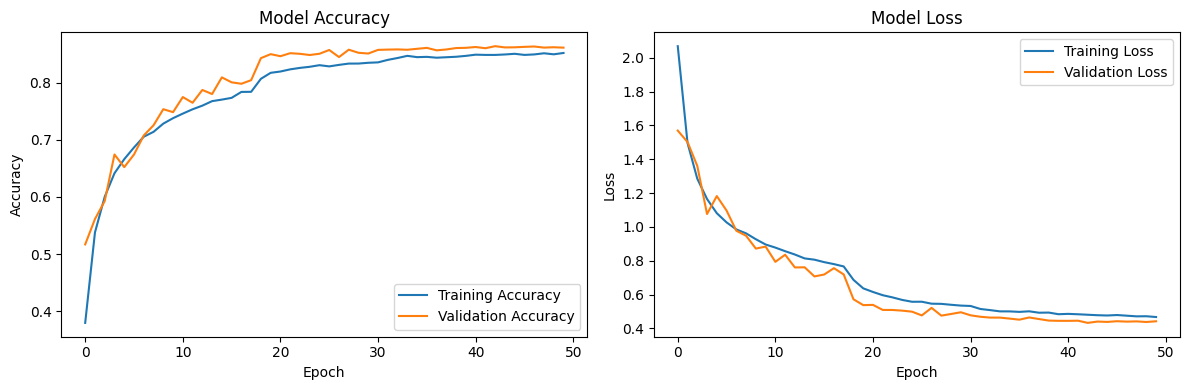

In [21]:
# Plot training history
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [22]:
# Load the best model from checkpoint
best_model = tf.keras.models.load_model('best_cnn_model.h5')

In [23]:
# Evaluate on test dataset
test_loss, test_acc = best_model.evaluate(X_test, y_test, verbose=1)
print(f"Test accuracy: {test_acc:.4f}")
print(f"Test loss: {test_loss:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8613 - loss: 0.4596
Test accuracy: 0.8603
Test loss: 0.4602


In [24]:
# Make predictions on test data
y_pred_probs = best_model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


In [25]:
# Generate the classification report
print("Classification Report:")
report = classification_report(y_true, y_pred, target_names=class_names)
print(report)

Classification Report:
              precision    recall  f1-score   support

    Airplane       0.89      0.86      0.87      1000
  Automobile       0.92      0.96      0.94      1000
        Bird       0.86      0.77      0.81      1000
         Cat       0.81      0.68      0.74      1000
        Deer       0.84      0.84      0.84      1000
         Dog       0.85      0.75      0.80      1000
        Frog       0.74      0.97      0.84      1000
       Horse       0.90      0.91      0.90      1000
        Ship       0.93      0.93      0.93      1000
       Truck       0.88      0.94      0.91      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



## Confusion Matrix

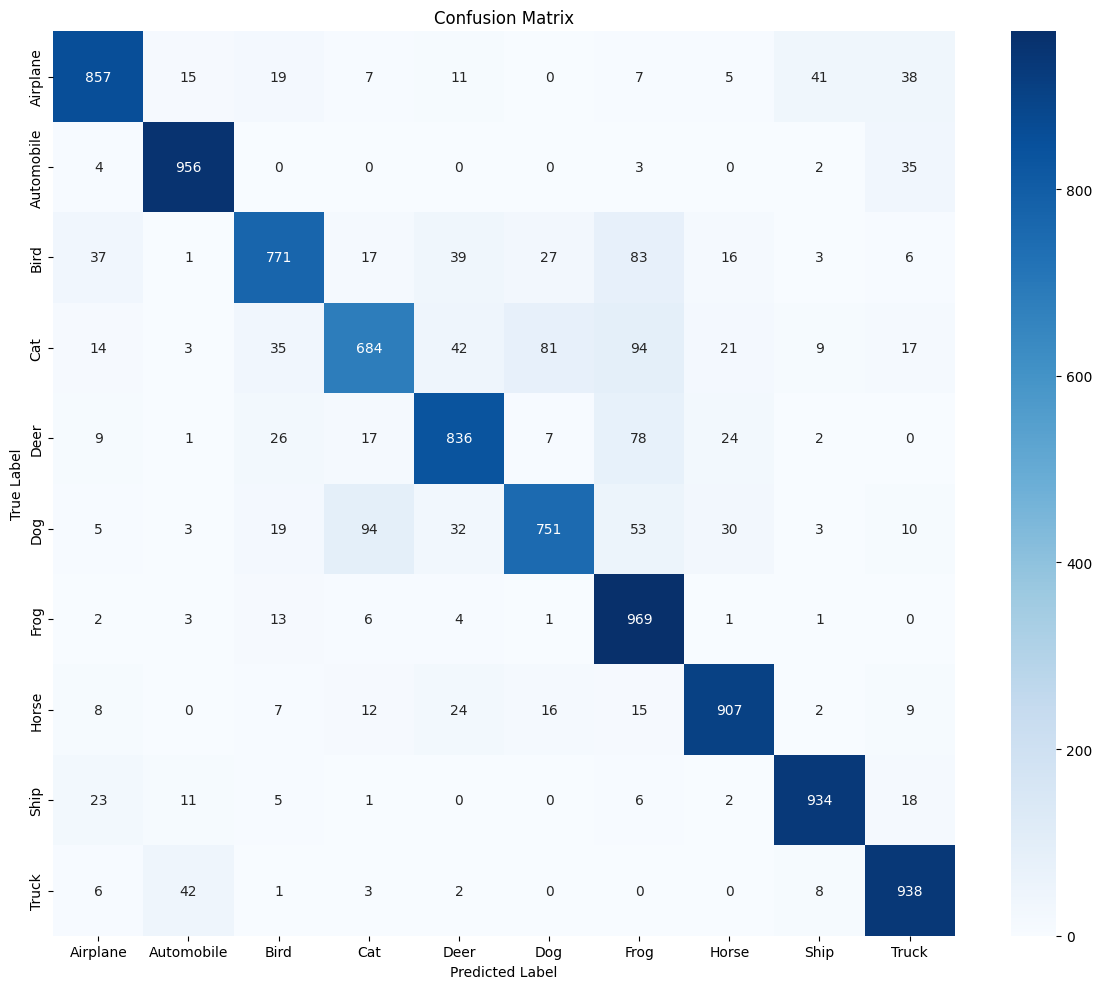

In [26]:
# Plot confusion matrix
plt.figure(figsize=(12, 10))
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

## Visualize Predictions

In [29]:
# Show examples of correct and incorrect predictions
def plot_predictions(X, y_true, y_pred, class_names, num_images=10):
    plt.figure(figsize=(15, 2 * num_images))
    correct_indices = np.where(y_true == y_pred)[0]
    incorrect_indices = np.where(y_true != y_pred)[0]

    # Plot some correct predictions
    for i in range(min(num_images//2, len(correct_indices))):
        plt.subplot(num_images, 2, 2*i+1)
        idx = correct_indices[i]
        plt.imshow(X[idx])
        plt.title(f"True: {class_names[y_true[idx]]}\nPred: {class_names[y_pred[idx]]}")
        plt.axis('off')

    # Plot some incorrect predictions
    for i in range(min(num_images//2, len(incorrect_indices))):
        plt.subplot(num_images, 2, 2*i+2)
        idx = incorrect_indices[i]
        plt.imshow(X[idx])
        plt.title(f"True: {class_names[y_true[idx]]}\nPred: {class_names[y_pred[idx]]}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

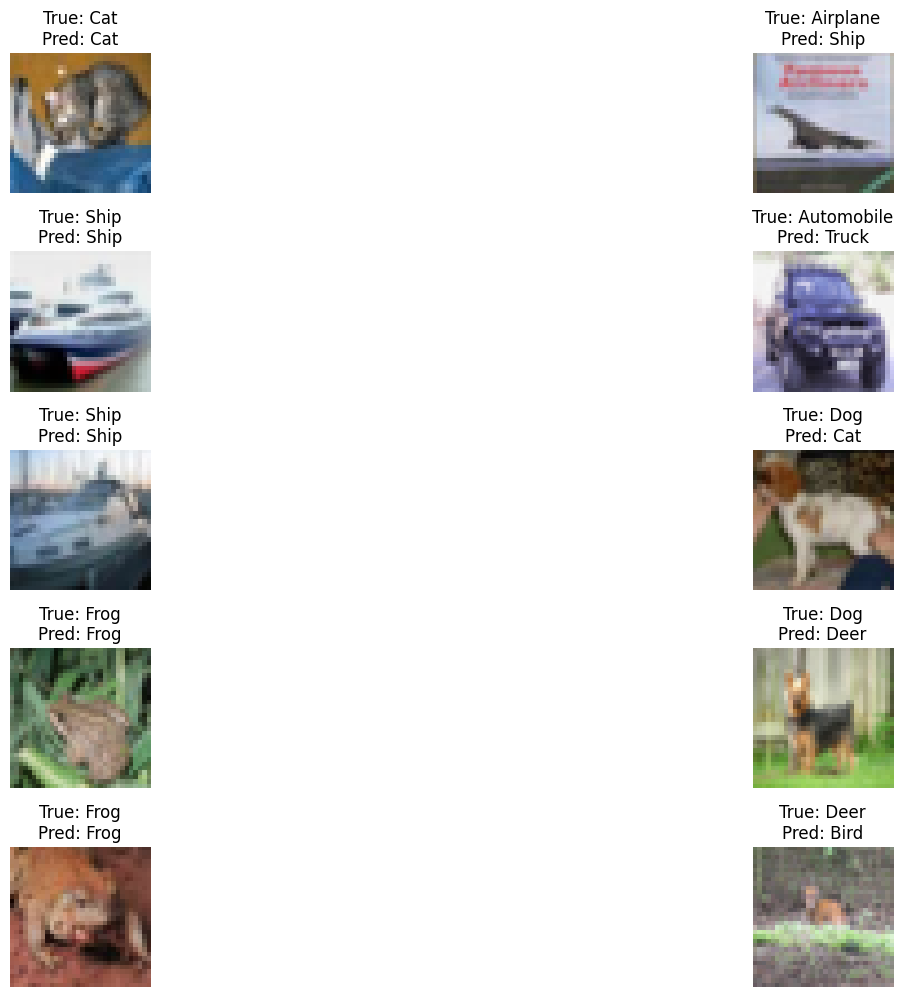

In [30]:
# Display prediction examples
plot_predictions(X_test, y_true, y_pred, class_names)